<a href="https://colab.research.google.com/github/ClarisseAlvarenga/DataScience_Comex_estudos/blob/master/Testes_estat%C3%ADsticos_RBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Aula 01 - Conhecendo e Explorando os dados

In [2]:
#Visualizando os dados do TMDB
dados = pd.read_excel('/content/Amostra_clusters_risco_negativado.xlsx')
dados = dados[['ID', 'Cliente BB (anos)', 'PONTUACAO_ROC',	'NT_RISCO',	'OP_C_PAISES_EM_LISTA_REST', 'CLUSTER_STD']].set_index('ID')
dados.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER_STD
ID,,,,,
1,15.583333,-2.72,-1.017755,False,4
2,27.052778,-2.63,-4.037228,True,2
3,15.955556,-2.57,-0.000573,True,4
4,24.477778,-3.07,-0.001145,False,2
5,24.555556,-3.18,-2.022910,True,2


In [3]:
#vendo a descrição destes dados (média, mediana, quartis, desvio padrão, etc)
dados.describe()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,CLUSTER_STD
count,1762.000000,1762.000000,1762.000000,1762.000000
mean,17.412617,-3.023757,-2.132451,2.010783
std,6.183032,0.688946,1.702001,1.589430
min,0.363889,-7.930000,-7.227377,0.000000
25%,15.006250,-3.070000,-3.029782,0.000000
50%,15.759722,-2.830000,-2.013746,2.000000
75%,18.740972,-2.690000,-1.004009,4.000000
max,50.522222,-1.750000,0.000000,4.000000


In [42]:
dados['MEDIA_DADOS_NUMERICOS'] = dados[['Cliente BB (anos)', 'PONTUACAO_ROC',	'NT_RISCO']].mean(axis=1)
dados.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER_STD,MEDIA_DADOS_NUMERICOS
ID,,,,,,
1,15.583333,-2.72,-1.017755,False,4,3.948526
2,27.052778,-2.63,-4.037228,True,2,6.795183
3,15.955556,-2.57,-0.000573,True,4,4.461661
4,24.477778,-3.07,-0.001145,False,2,7.135544
5,24.555556,-3.18,-2.022910,True,2,6.450882


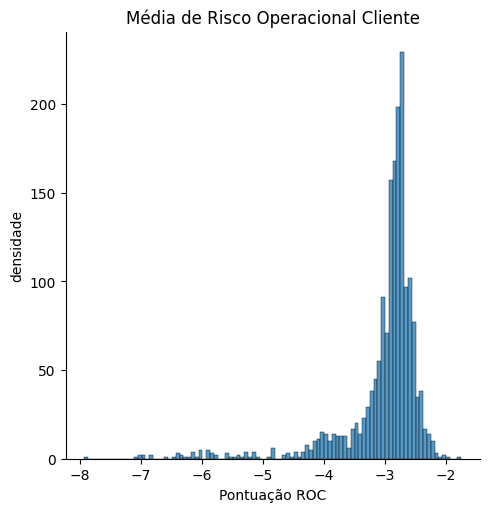

In [43]:
#visualizando a distribuição ROC
ax = sns.displot(dados['PONTUACAO_ROC'])
ax.set(xlabel='Pontuação ROC', ylabel='densidade', title= 'Média de Risco Operacional Cliente')


[Text(0.5, 0, 'NT_RISCO'),
 Text(0, 0.5, 'densidade'),
 Text(0.5, 1.0, 'Média de Risco')]

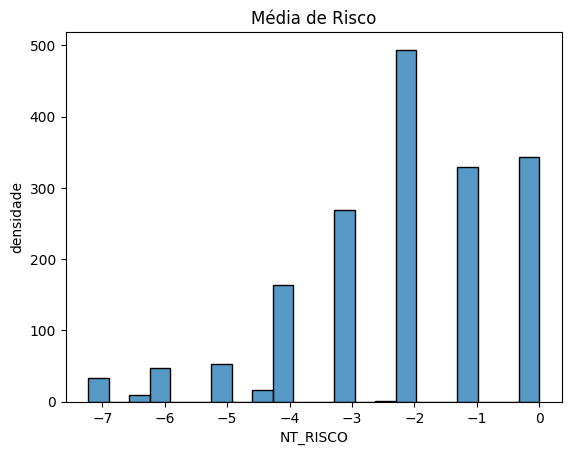

In [44]:
#visualizando a distribuição de NT_RISCO
ax = sns.histplot(dados['NT_RISCO'])
ax.set(xlabel='NT_RISCO', ylabel='densidade', title= 'Média de Risco')

[Text(0.5, 0, 'Cliente BB (anos)'),
 Text(0, 0.5, 'densidade'),
 Text(0.5, 1.0, 'Média de Tempo de Banco')]

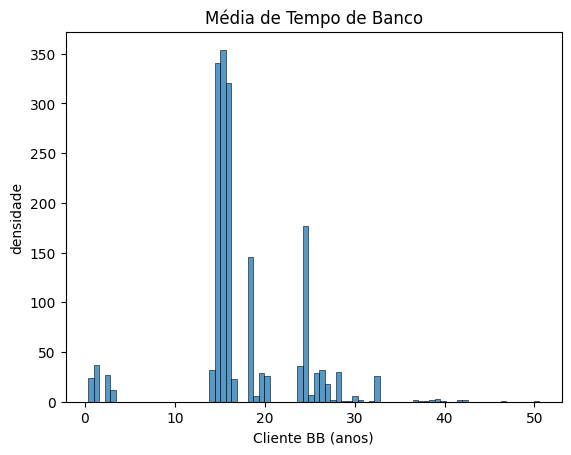

In [45]:
#visualizando a distribuição de Tempo Cliente
ax = sns.histplot(dados['Cliente BB (anos)'])
ax.set(xlabel='Cliente BB (anos)', ylabel='densidade', title= 'Média de Tempo de Banco')

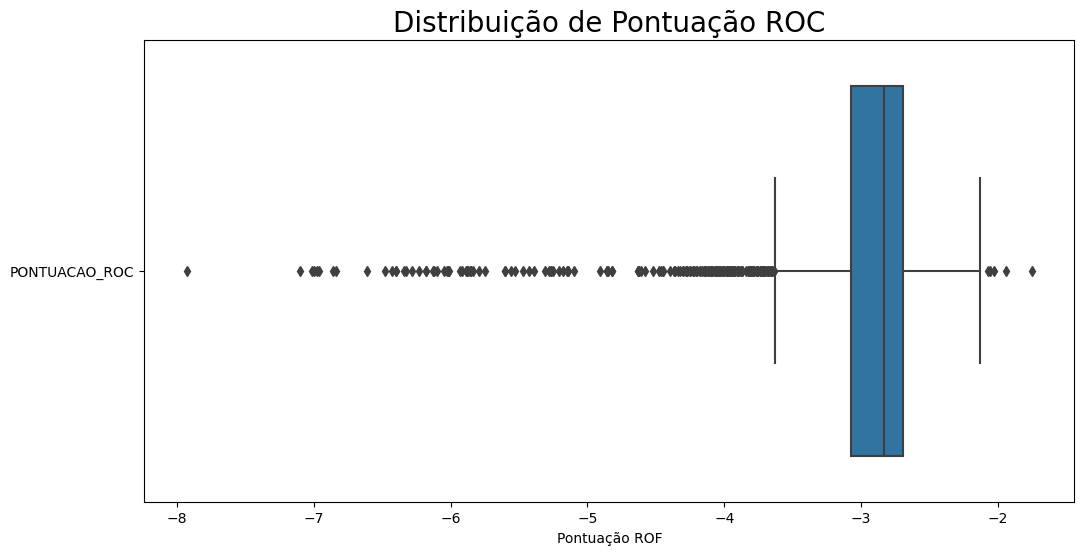

In [46]:
#Vendo o BoxPlot da média da Pontuação ROC
plt.figure(figsize=(12,6))
ax = sns.boxplot(dados[['PONTUACAO_ROC']], orient="h" )
ax.set(xlabel='Pontuação ROF')
ax.set_title('Distribuição de Pontuação ROC', fontsize=20)
plt.show()


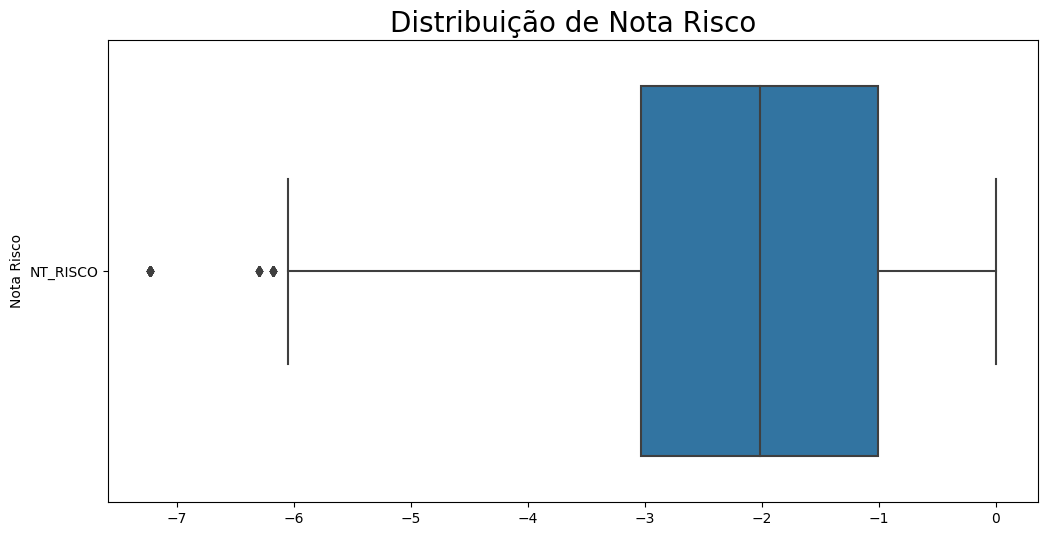

In [47]:
#Vendo o BoxPlot da média da NT_RISCO
plt.figure(figsize=(12,6))
ax = sns.boxplot(dados[['NT_RISCO']], orient="h" )
ax.set(ylabel='Nota Risco')
ax.set_title('Distribuição de Nota Risco', fontsize=20)
plt.show()

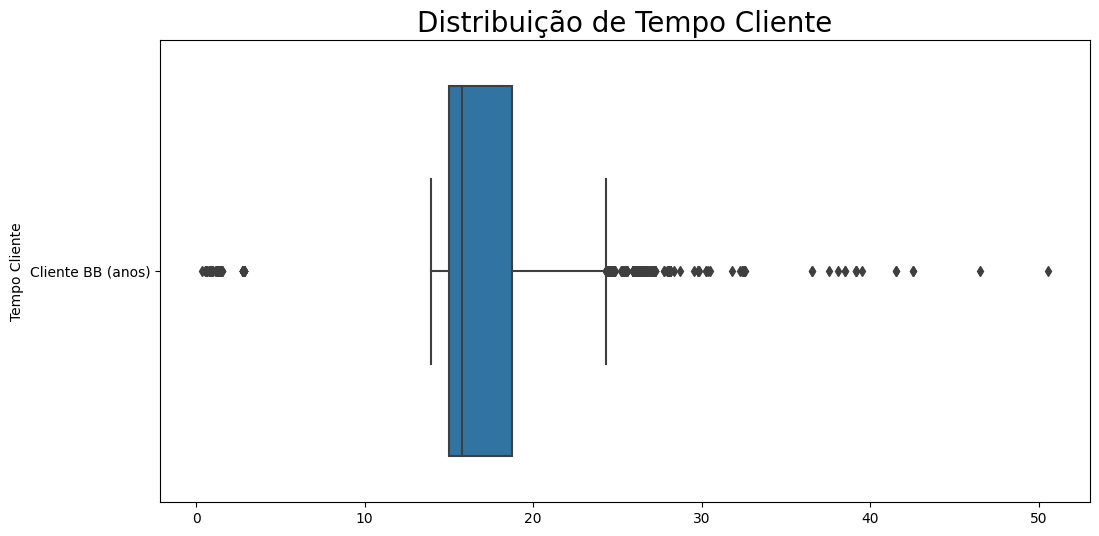

In [48]:
#Vendo o BoxPlot da média da Tempo Cliente
plt.figure(figsize=(12,6))
ax = sns.boxplot(dados[['Cliente BB (anos)']], orient="h" )
ax.set(ylabel='Tempo Cliente')
ax.set_title('Distribuição de Tempo Cliente', fontsize=20)
plt.show()

In [49]:
#Visualizando clientes cluster 0
grupo_0 = dados.query("CLUSTER_STD == 0").drop('CLUSTER_STD', axis=1)
grupo_1 = dados.query("CLUSTER_STD == 1").drop('CLUSTER_STD', axis=1)
grupo_2 = dados.query("CLUSTER_STD == 2").drop('CLUSTER_STD', axis=1)
grupo_3 = dados.query("CLUSTER_STD == 3").drop('CLUSTER_STD', axis=1)
grupo_4 = dados.query("CLUSTER_STD == 4").drop('CLUSTER_STD', axis=1)
grupo_0.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,MEDIA_DADOS_NUMERICOS
ID,,,,,
6,20.208333,-2.63,-3.005155,True,4.857726
10,15.925000,-2.74,-3.013746,False,3.390418
14,20.350000,-2.86,-2.008591,True,5.160470
15,18.727778,-2.73,-2.021191,False,4.658862
17,18.463889,-2.89,-3.032073,False,4.180605


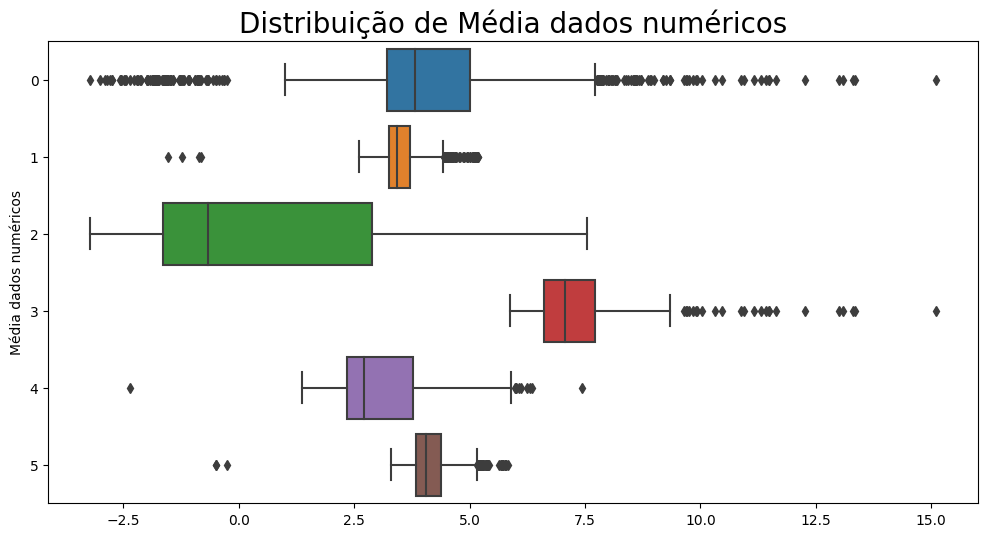

In [50]:
#Vendo o BoxPlot da média da Média dados numéricos
plt.figure(figsize=(12,6))
ax = sns.boxplot([dados[['MEDIA_DADOS_NUMERICOS']], grupo_0[['MEDIA_DADOS_NUMERICOS']], grupo_1[['MEDIA_DADOS_NUMERICOS']],
                  grupo_2[['MEDIA_DADOS_NUMERICOS']], grupo_3[['MEDIA_DADOS_NUMERICOS']], grupo_4[['MEDIA_DADOS_NUMERICOS']]], orient="h" )
ax.set(ylabel='Média dados numéricos')
ax.set_title('Distribuição de Média dados numéricos', fontsize=20)
plt.show()

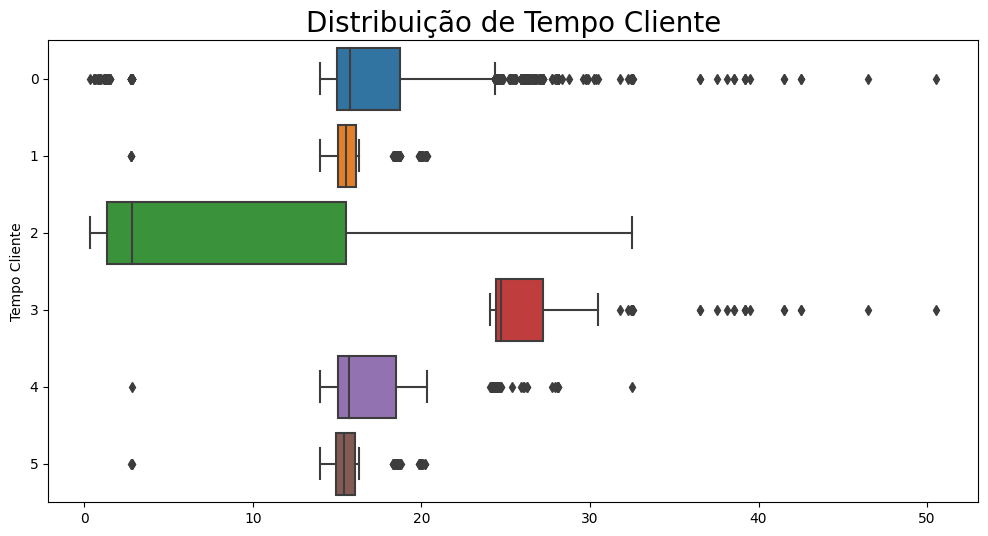

In [31]:
#Vendo o BoxPlot da média da Tempo Cliente
plt.figure(figsize=(12,6))
ax = sns.boxplot([dados[['Cliente BB (anos)']], grupo_0[['Cliente BB (anos)']], grupo_1[['Cliente BB (anos)']],
                  grupo_2[['Cliente BB (anos)']], grupo_3[['Cliente BB (anos)']], grupo_4[['Cliente BB (anos)']]], orient="h" )
ax.set(ylabel='Tempo Cliente')
ax.set_title('Distribuição de Tempo Cliente', fontsize=20)
plt.show()

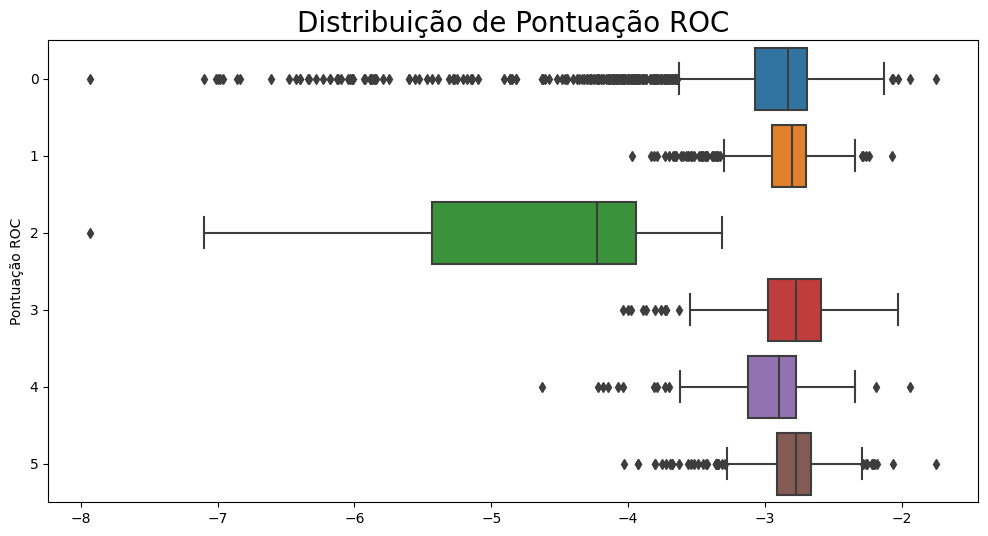

In [32]:
#Vendo o BoxPlot da média da Pontuação ROC
plt.figure(figsize=(12,6))
ax = sns.boxplot([dados[['PONTUACAO_ROC']], grupo_0[['PONTUACAO_ROC']], grupo_1[['PONTUACAO_ROC']],
                  grupo_2[['PONTUACAO_ROC']], grupo_3[['PONTUACAO_ROC']], grupo_4[['PONTUACAO_ROC']]], orient="h" )
ax.set(ylabel='Pontuação ROC')
ax.set_title('Distribuição de Pontuação ROC', fontsize=20)
plt.show()

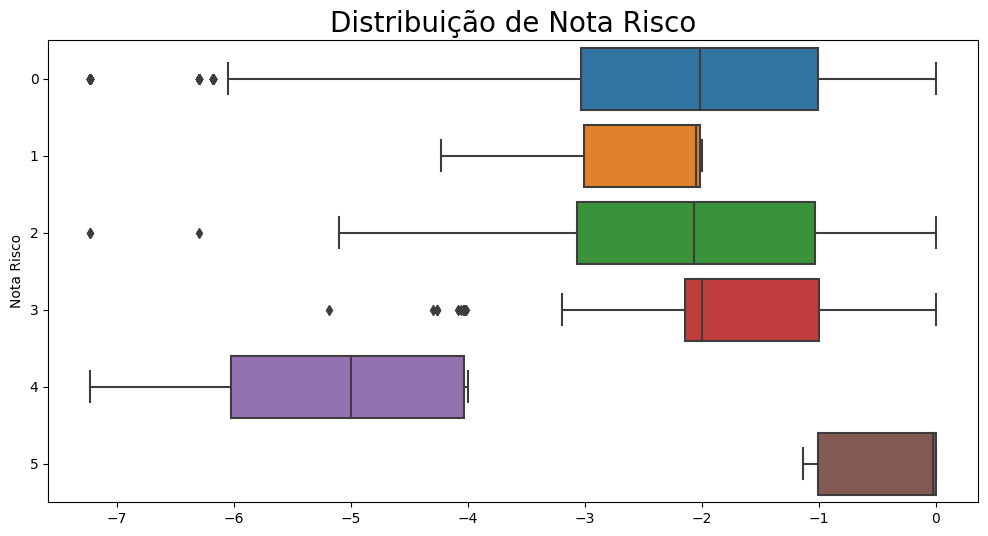

In [33]:
#Vendo o BoxPlot da média da Nota Risco
plt.figure(figsize=(12,6))
ax = sns.boxplot([dados[['NT_RISCO']], grupo_0[['NT_RISCO']], grupo_1[['NT_RISCO']],
                  grupo_2[['NT_RISCO']], grupo_3[['NT_RISCO']], grupo_4[['NT_RISCO']]], orient="h" )
ax.set(ylabel='Nota Risco')
ax.set_title('Distribuição de Nota Risco', fontsize=20)
plt.show()

In [51]:
 #Média dos dados gerais
 dados.mean()

Cliente BB (anos)            17.412617
PONTUACAO_ROC                -3.023757
NT_RISCO                     -2.132451
OP_C_PAISES_EM_LISTA_REST     0.639614
CLUSTER_STD                   2.010783
MEDIA_DADOS_NUMERICOS         4.085470
dtype: float64

In [52]:
#média dos dados do cluster 0
grupo_0.mean()

Cliente BB (anos)            15.883552
PONTUACAO_ROC                -2.849962
NT_RISCO                     -2.389065
OP_C_PAISES_EM_LISTA_REST     0.648752
MEDIA_DADOS_NUMERICOS         3.548175
dtype: float64

In [53]:
#média dos dados do cluster 1
grupo_1.mean()

Cliente BB (anos)            8.661604
PONTUACAO_ROC               -4.684556
NT_RISCO                    -2.433261
OP_C_PAISES_EM_LISTA_REST    0.485207
MEDIA_DADOS_NUMERICOS        0.514596
dtype: float64

In [54]:
#média dos dados do cluster 2
grupo_2.mean()

Cliente BB (anos)            26.734530
PONTUACAO_ROC                -2.812677
NT_RISCO                     -1.649065
OP_C_PAISES_EM_LISTA_REST     0.732308
MEDIA_DADOS_NUMERICOS         7.424263
dtype: float64

In [55]:
#média dos dados do cluster 3
grupo_3.mean()

Cliente BB (anos)            17.559827
PONTUACAO_ROC                -2.957652
NT_RISCO                     -5.048372
OP_C_PAISES_EM_LISTA_REST     0.602273
MEDIA_DADOS_NUMERICOS         3.184601
dtype: float64

In [56]:
#média dos dados do cluster 4
grupo_4.mean()

Cliente BB (anos)            15.770957
PONTUACAO_ROC                -2.808282
NT_RISCO                     -0.481859
OP_C_PAISES_EM_LISTA_REST     0.641822
MEDIA_DADOS_NUMERICOS         4.160272
dtype: float64

### Medindo um intervalo de confiança para poder generalizar o resultado de uma amostra

In [57]:
#dado meu conjunto de dados e considerando que é uma distribuição normal e com n suficiente, este é o intervalo de confiança desta amostra
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

In [59]:
zconfint(dados['MEDIA_DADOS_NUMERICOS'])

(3.9818092819782414, 4.1891300099940265)

In [61]:
dados['MEDIA_DADOS_NUMERICOS'].mean()

4.085469645986134

In [62]:
#calculando o intervalo de confiança usando um teste T - o T foi feito para amostras pequenas
descritivo_grupo_0 = DescrStatsW(grupo_0['MEDIA_DADOS_NUMERICOS'])

In [63]:
descritivo_grupo_0

In [64]:
#usando a significancia de 5%
descritivo_grupo_0.tconfint_mean(0.05)

(3.4907595556540962, 3.6055908044414413)

## Aula 04  - ZTest e TTest

In [73]:
#Hipótese nula: As médias do grupo_0 tem a mesma média da média total
z_teste, p_valor = ztest(grupo_4['MEDIA_DADOS_NUMERICOS'], value=dados['MEDIA_DADOS_NUMERICOS'].mean())
print(z_teste)
print(p_valor)

2.5912325092616837
0.009563285483234847


In [74]:
#teste de hipótese: se p_valor < =  significancia (neste caso 5%, rejeitamos a hipótese nula)
#teste bastante sensível no big Data - talvez sensível demais
p_valor <= 0.05

True

## Aula 05: Testes para duas amostras

In [75]:
zconfint(dados['MEDIA_DADOS_NUMERICOS'], grupo_0['MEDIA_DADOS_NUMERICOS'])

(0.3441076332982467, 0.7304812985784841)

In [76]:
#conferindo se as notas_1 tem uma média maior que a geral
print(ztest(dados['MEDIA_DADOS_NUMERICOS'], grupo_0['MEDIA_DADOS_NUMERICOS']))

(5.4510847760189876, 5.006349614065765e-08)


In [77]:
#usando o ttest
from scipy.stats import ttest_ind

In [78]:
ttest_ind(dados['MEDIA_DADOS_NUMERICOS'], grupo_0['MEDIA_DADOS_NUMERICOS'])

TtestResult(statistic=5.451084776018988, pvalue=5.54574660550335e-08, df=2281.0)

In [95]:
descr_todas_as_medias = DescrStatsW(dados['Cliente BB (anos)'])
descr_grupo_0 = DescrStatsW(grupo_0['Cliente BB (anos)'])
descr_grupo_1 = DescrStatsW(grupo_1['Cliente BB (anos)'])
descr_grupo_2 = DescrStatsW(grupo_2['Cliente BB (anos)'])
descr_grupo_3 = DescrStatsW(grupo_3['Cliente BB (anos)'])
descr_grupo_4 = DescrStatsW(grupo_4['Cliente BB (anos)'])

In [96]:
#criando uma comparação pra usar o CompareMeans()
for i in [descr_grupo_0, descr_grupo_1,descr_grupo_2,descr_grupo_3,descr_grupo_4,]:
  comparacao = descr_todas_as_medias.get_compare(i)
  print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      1.5291      0.275      5.569      0.000       0.991       2.068
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      8.7510      0.513     17.066      0.000       7.745       9.757
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -9.3219      0.356    -26.190      0.000     -10.020      -8.624
                          Test for equality of means

In [87]:
#usando o ztest
print(comparacao.summary())


                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.5373      0.099      5.451      0.000       0.344       0.731


In [ ]:
#usando o ttest
print(comparacao.summary(use_t=True))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.4194      0.071     -5.894      0.000      -0.559      -0.280


### Visualização gráfica

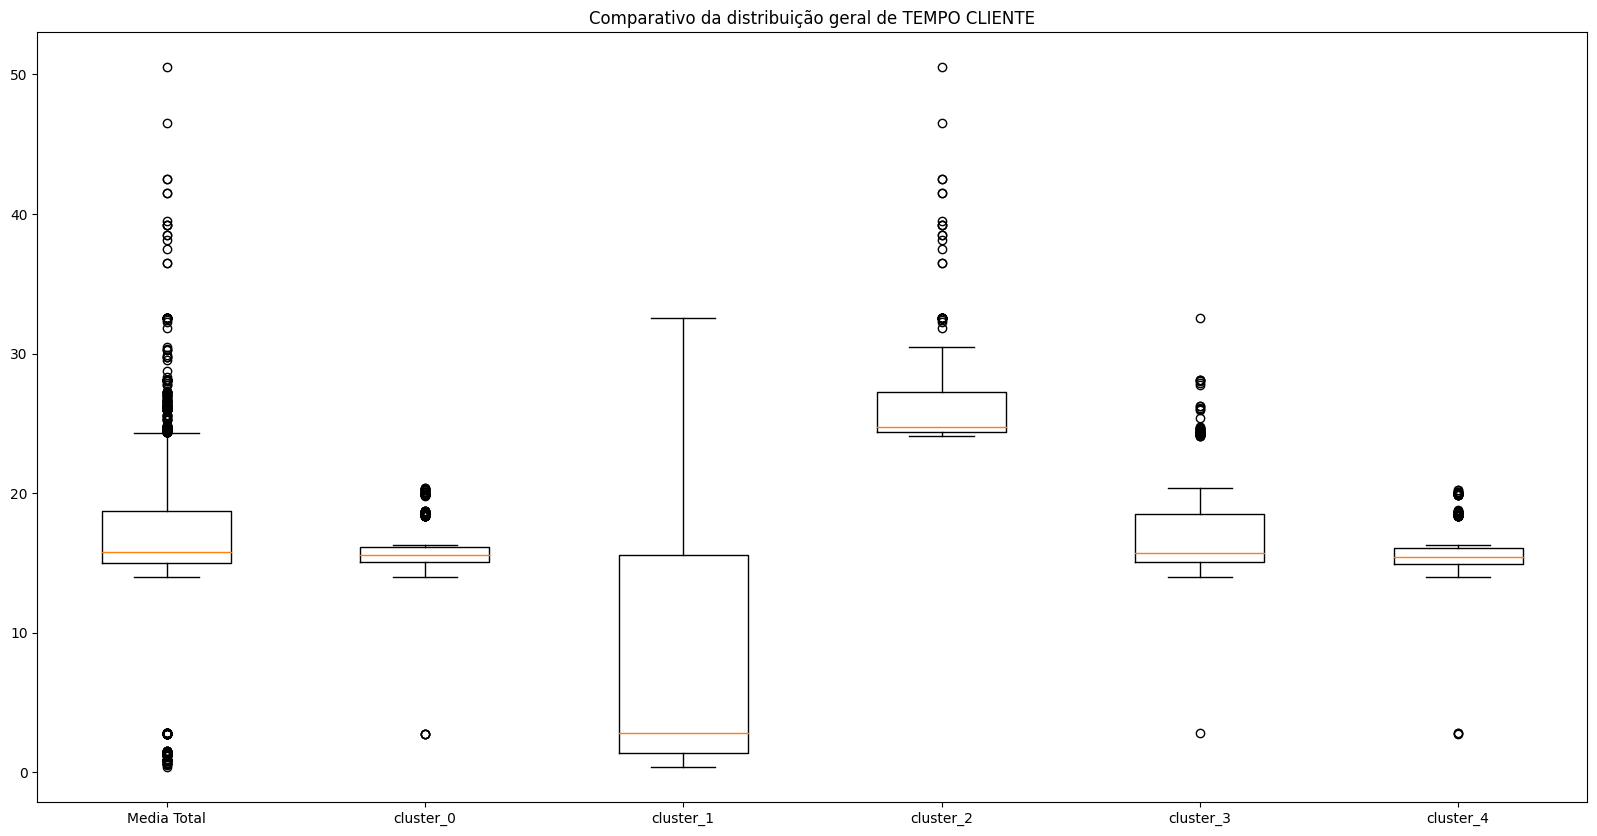

In [100]:
#Criando um boxplot com os dois dados que estamos comparando
plt.figure(figsize=(20,10))
plt.boxplot([dados['Cliente BB (anos)'],grupo_0['Cliente BB (anos)'], grupo_1['Cliente BB (anos)'],
             grupo_2['Cliente BB (anos)'], grupo_3['Cliente BB (anos)'], grupo_4['Cliente BB (anos)']],
             labels=['Media Total', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])
plt.title('Comparativo da distribuição geral de TEMPO CLIENTE')
plt.show()

## Aula 06 - Testes não paramétricos

### Testes não paramétricos

In [101]:
from scipy.stats import normaltest

In [102]:
stats, p_valor = normaltest(dados['MEDIA_DADOS_NUMERICOS'])
print(stats)
print(p_valor)

102.8092698682938
4.734244723943006e-23


In [103]:
#Hipótese nula = a distribuição é uma normal (com 5% de significância)
p_valor <= 0.05

True

In [113]:
#usando um teste não paramétrico (ou seja, que não exija distribuição normal)
#usar um teste de Wilcoxon com ranqueamento
#Hipótese nula é que os dois sets vieram de uma mesma distribuição / Hipótese alternativa é a de que os valores de uma amostra são provavelmenmte maiores que os de outra amostra
from scipy.stats import ranksums

_,p_value = ranksums(dados['MEDIA_DADOS_NUMERICOS'], grupo_4['MEDIA_DADOS_NUMERICOS'])
p_value

1.5731050565737357e-09

In [114]:
#Hipótese nula = Hipótese nula é que os dois sets vieram de uma mesma distribuição
p_valor <= 0.05

True